## Feature Selection - Activities

In [63]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

In [64]:
dta = pd.read_csv('data/activity_data.csv')
dta.columns

Index(['Participant_ID', 'Dementia', 'Age_yrs', 'Education_yrs', 'Reads',
       'Surfs_Internet', 'Plays_Games', 'Invests', 'Discusses',
       'Writes_Paints', 'Plays_Instrument', 'Intellect_Other', 'Attends_Class',
       'Joins_Center', 'Volunteers', 'Watches_Entertainment', 'Meets_People',
       'Sees_Dramas', 'Sings', 'Attends_Religion', 'Social_Other',
       'Watches_TV', 'Listens_Music', 'Shops', 'Cooks', 'Fishes', 'Has_Pets',
       'Gets_Massages', 'Recreation_Other', 'Does_Yoga', 'Strenuous_Aerobic',
       'Light_Aerobic', 'Strenuous_Aerobic.1', 'Stretches_Tones',
       'Physical_Other'],
      dtype='object')

In [36]:
# split into input (X) and output (y) variables
X = dta[['Reads',
       'Surfs_Internet', 'Plays_Games', 'Invests', 'Discusses',
       'Writes_Paints', 'Plays_Instrument', 'Intellect_Other', 'Attends_Class',
       'Joins_Center', 'Volunteers', 'Watches_Entertainment', 'Meets_People',
       'Sees_Dramas', 'Sings', 'Attends_Religion', 'Social_Other',
       'Watches_TV', 'Listens_Music', 'Shops', 'Cooks', 'Fishes', 'Has_Pets',
       'Gets_Massages', 'Recreation_Other', 'Does_Yoga', 'Strenuous_Aerobic',
       'Light_Aerobic', 'Stretches_Tones',
       'Physical_Other']]
y = dta[['Dementia']]

Excluded age_category above

In [37]:
# format all fields as string
X = X.astype(str)

In [38]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [39]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

In [40]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [41]:
search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[500,1000,1500]}
    
]

In [42]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [43]:
search.fit(train_X,train_y)

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vecto

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A col

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier(max_depth=4,
                                                           n_estimators=500)],
                          'model__max_depth': [2, 3, 4],
                          'model__n_estimators': [500, 1000, 1500]}],
             scoring='roc_auc')

In [44]:
search.best_score_

0.7373546904233869

In [45]:
search.best_params_

{'model': RandomForestClassifier(max_depth=4, n_estimators=500),
 'model__max_depth': 4,
 'model__n_estimators': 500}

In [46]:
rf_mod = search.best_estimator_

In [47]:
m.roc_auc_score(train_y,rf_mod.predict_proba(train_X)[:,1])

0.8110549852443286

In [48]:
m.accuracy_score(train_y,rf_mod.predict(train_X))

0.7295719844357976

In [51]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=5)

In [52]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,Watches_TV,0.024125,0.005850,0.012425,0.035824
1,Listens_Music,0.012451,0.003812,0.004826,0.020076
2,Reads,0.008560,0.005307,-0.002053,0.019174
3,Discusses,0.007393,0.004504,-0.001615,0.016401
4,Stretches_Tones,0.006226,0.002859,0.000507,0.011944
5,Has_Pets,0.005447,0.002859,-0.000271,0.011166
6,Writes_Paints,0.004669,0.001984,0.000701,0.008637
7,Meets_People,0.004280,0.000778,0.002724,0.005837
8,Attends_Religion,0.003502,0.000778,0.001946,0.005058
9,Invests,0.003502,0.002269,-0.001036,0.008040


In [62]:
# Plot
features = (
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="") + 
    ggtitle("Figure 5: Permutation Importance")
)
ggsave(plot = features, filename = 'permutations', path = "/Users/morganzimmerman/Desktop/Problem_Sets/DATA_SCIENCE/final_project/alzheimers_project/visuals")

## Feature Selection - Diet

In [65]:
dta2 = pd.read_csv('data/diet_data.csv')
dta2.columns

Index(['Participant_ID', 'Category', 'Age_yrs', 'Education_yrs',
       'Carbo_category_Frequent', 'Protein_category_Frequent',
       'Vegetable_category_Frequent', 'Fruit_category_Frequent',
       'Salted_fish_category_Frequent', 'Instant_noodle_category_Frequent',
       'Tempe_category_Frequent'],
      dtype='object')

In [68]:
# split into input (X) and output (y) variables
X = dta2[['Carbo_category_Frequent', 'Protein_category_Frequent',
       'Vegetable_category_Frequent', 'Fruit_category_Frequent',
       'Salted_fish_category_Frequent', 'Instant_noodle_category_Frequent',
       'Tempe_category_Frequent']]
y = dta2[['Category']]

In [69]:
# format all fields as string
X = X.astype(str)

In [70]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [71]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

In [72]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [73]:
search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[500,1000,1500]}
    
]

In [74]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [75]:
search.fit(train_X,train_y)

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vecto

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py

/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/morganzimmerman/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier(max_depth=4,
                                                           n_estimators=1500)],
                          'model__max_depth': [2, 3, 4],
                          'model__n_estimators': [500, 1000, 1500]}],
             scoring='roc_auc')

In [76]:
search.best_score_

0.561626998001998

In [77]:
search.best_params_

{'model': RandomForestClassifier(max_depth=4, n_estimators=1500),
 'model__max_depth': 4,
 'model__n_estimators': 1500}

In [78]:
rf_mod2 = search.best_estimator_

In [79]:
m.roc_auc_score(train_y,rf_mod2.predict_proba(train_X)[:,1])

0.8089569160997733

In [80]:
m.accuracy_score(train_y,rf_mod2.predict(train_X))

0.7210884353741497

In [81]:
vi = permutation_importance(rf_mod2,train_X,train_y,n_repeats=5)

In [82]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,Fruit_category_Frequent,0.008163,0.002721,2.721088e-03,0.013605
1,Carbo_category_Frequent,0.006803,0.006085,-5.366356e-03,0.018972
2,Protein_category_Frequent,0.005442,0.002721,-8.673617e-19,0.010884
3,Instant_noodle_category_Frequent,0.005442,0.002721,0.000000e+00,0.010884
4,Vegetable_category_Frequent,0.004082,0.003333,-2.583646e-03,0.010747
5,Tempe_category_Frequent,0.004082,0.003333,-2.583646e-03,0.010747
6,Salted_fish_category_Frequent,0.002721,0.003333,-3.944190e-03,0.009386


In [85]:
# Plot
diets = (
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="") + 
    ggtitle("Figure 5: Permutation Importance")
)
ggsave(plot = diets, filename = 'diets', path = "/Users/morganzimmerman/Desktop/Problem_Sets/DATA_SCIENCE/final_project/alzheimers_project/visuals")

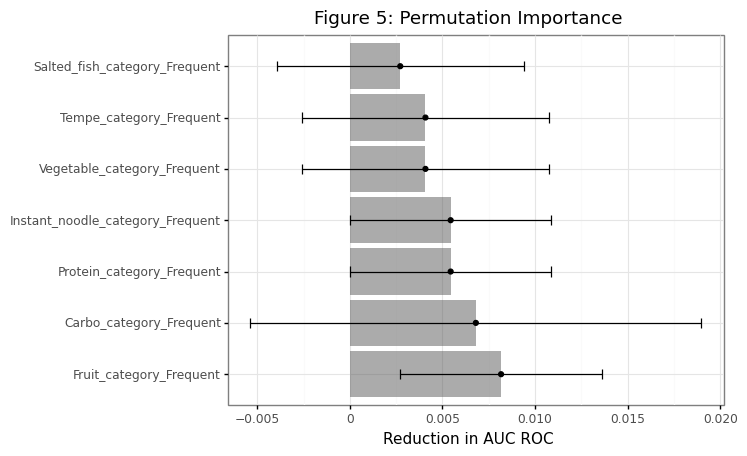

<ggplot: (8772483445640)>

In [84]:
diets